In [1]:
import dmrg2 as dmrg
import dmrg1 as dmrg1
import SpinSystems_1d as SS1d
import numpy as np
import matplotlib.pyplot as plt
from ncon import ncon
import MPO_class as MPO
import MPS_class as MPS
import seaborn as sns

import tdvp2 as tdvp
import MPS_class as MPS
import tdvp as tdvp1

#%matplotlib notebook 


In [2]:
# 0.5, 0.2, 0.1

In [3]:
h = 0
J = 1

def apply_flip(M,epsilon):
    theta = np.pi+2*epsilon
    flip = np.eye(2)*np.cos(theta/2) - 1j*np.sin(theta/2)*np.array([[0,1],[1,0]])
    for i in range(len(M)):
        M[i] = ncon([M[i],flip],[[-1,1,-3],[1,-2]])

In [4]:
dt = 1
k  = 6

Mz_eps =[]
ent_eps = []

L = 121
MzMPO = MPO.getMzMPO(L)

for epsilon in [0.1,0.2,0.3,0.4,0.5]:
    H = SS1d.IsingMPO(L,h,J)
    time_engine = tdvp.TDVP2(MPS.getAllUp(L),H,64)

    mz_list = []
    t_list = []
    Mz_list = []
    ent_  = []  
    t_list.append(0.)
    
    mz_list.append(MPO.return_LocalMz(time_engine.MPS))#.real.reshape(Lx,Ly))
    Mz_list.append(MzMPO.contractMPOMPS(time_engine.MPS).real)
    ent_.append(time_engine.MPS.compute_EntEntropy())

    for j in range(21):
        print('epsilon',epsilon,'step',j,r'Border, \Delta mz: ',mz_list[j][0].real-mz_list[j][-1].real)
        time_engine.initialize()

        # Evolve the state of t1->t2, t2-t1=0.5
        for _ in range(k):
            time_engine.time_step(dt/k,1e-9)

        apply_flip(time_engine.MPS.M, epsilon)

        t_list.append((j+1)*dt)
        mz_list.append(MPO.return_LocalMz(time_engine.MPS))#.real.reshape(Lx,Ly))
        Mz_list.append(MzMPO.contractMPOMPS(time_engine.MPS))
        ent_.append(time_engine.MPS.compute_EntEntropy())
    
    Mz_eps.append(Mz_list)
    ent_eps.append(ent_)

epsilon 0.1 step 0 Border, \Delta mz:  0.0


C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: RuntimeWarning: beta[0] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: RuntimeWarning: beta[1] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: RuntimeWarning: beta[3] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: RuntimeWarning: beta[2] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: RuntimeWarning: beta[5] ~= 0 encountered during Lanczos iteration.
  warnings.warn(


epsilon 0.1 step 1 Border, \Delta mz:  -2.220446049250313e-16
epsilon 0.1 step 2 Border, \Delta mz:  -9.992007221626409e-16
epsilon 0.1 step 3 Border, \Delta mz:  -2.220446049250313e-16
epsilon 0.1 step 4 Border, \Delta mz:  1.7763568394002505e-14
epsilon 0.1 step 5 Border, \Delta mz:  1.3511414209688155e-13
epsilon 0.1 step 6 Border, \Delta mz:  5.4289905904170155e-14
epsilon 0.1 step 7 Border, \Delta mz:  -2.662203790748663e-12
epsilon 0.1 step 8 Border, \Delta mz:  2.6643132144954507e-12
epsilon 0.1 step 9 Border, \Delta mz:  9.900413822094833e-12
epsilon 0.1 step 10 Border, \Delta mz:  8.662293105032859e-12
epsilon 0.1 step 11 Border, \Delta mz:  -1.3829937195453113e-11
epsilon 0.1 step 12 Border, \Delta mz:  -3.645339585744978e-11
epsilon 0.1 step 13 Border, \Delta mz:  -1.5729084701376905e-11
epsilon 0.1 step 14 Border, \Delta mz:  4.4386494479908833e-11
epsilon 0.1 step 15 Border, \Delta mz:  7.846312488624108e-11
epsilon 0.1 step 16 Border, \Delta mz:  1.030586727068794e-11
eps

C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: RuntimeWarning: beta[4] ~= 0 encountered during Lanczos iteration.
  warnings.warn(
C:\Users\asant\Documents\GitHub\Tensor-Network\LanczosRoutines.py:38: RuntimeWarning: beta[7] ~= 0 encountered during Lanczos iteration.
  warnings.warn(


epsilon 0.5 step 2 Border, \Delta mz:  -1.6653345369377348e-15
epsilon 0.5 step 3 Border, \Delta mz:  -1.4432899320127035e-15
epsilon 0.5 step 4 Border, \Delta mz:  1.6653345369377348e-15
epsilon 0.5 step 5 Border, \Delta mz:  -2.142730437526552e-14
epsilon 0.5 step 6 Border, \Delta mz:  -4.96713781217295e-13
epsilon 0.5 step 7 Border, \Delta mz:  -3.4597102960276516e-11
epsilon 0.5 step 8 Border, \Delta mz:  5.968747718299028e-11
epsilon 0.5 step 9 Border, \Delta mz:  -9.647033634152535e-07
epsilon 0.5 step 10 Border, \Delta mz:  -1.1543489979670696e-05
epsilon 0.5 step 11 Border, \Delta mz:  -0.00011748904377872904
epsilon 0.5 step 12 Border, \Delta mz:  8.547308811501786e-05
epsilon 0.5 step 13 Border, \Delta mz:  9.954239971965428e-06
epsilon 0.5 step 14 Border, \Delta mz:  -6.366892815001801e-05
epsilon 0.5 step 15 Border, \Delta mz:  0.00012322056202274112
epsilon 0.5 step 16 Border, \Delta mz:  -0.00019826704600356404
epsilon 0.5 step 17 Border, \Delta mz:  0.0002564754425856685

In [5]:
Mz = np.array(Mz_list).real

In [6]:
np.allclose(Mz,mz_.sum(axis=1))

NameError: name 'mz_' is not defined

In [ ]:
Mz.shape

In [ ]:
for x in time_engine.MPS.M:
    print(x.shape)

In [23]:
mz_ = np.array(mz_list).reshape(len(mz_list),L).real

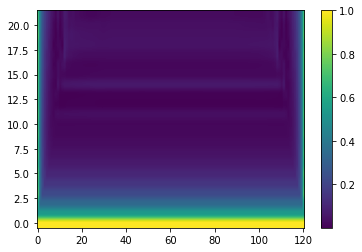

In [24]:
plt.imshow(np.abs(mz_),origin='lower',aspect='auto')
plt.colorbar()

In [8]:
plt.plot(np.abs(mz_[20,:]))

IndexError: index 20 is out of bounds for axis 0 with size 19

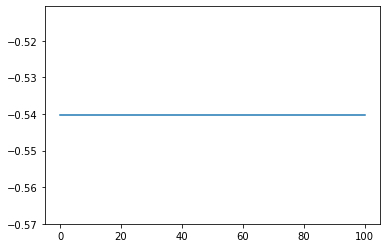

In [9]:
plt.plot(mz_[1,:].real)

In [10]:
pcov

NameError: name 'pcov' is not defined

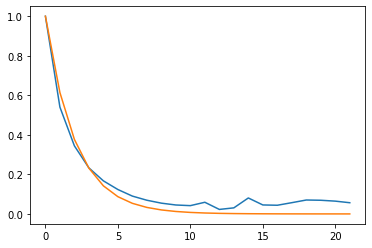

In [12]:
from scipy.optimize import curve_fit

def expdecay(t,a):
    return np.exp(-t/a)

plt.plot(np.abs(np.array(Mz_list).real)/L)

popt, pcov = curve_fit(expdecay,t_list,np.abs(np.array(Mz_list).real)/L)
plt.plot(t_list,expdecay(np.array(t_list),popt[0]))

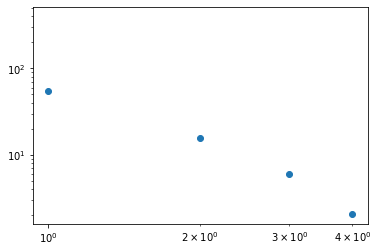

In [22]:
plt.plot(a_list,'o')
plt.xscale('log')
plt.yscale('log')

[[283.4454349]]
[[1.65959616]]
[[0.17037787]]
[[0.08486682]]
[[0.01928441]]


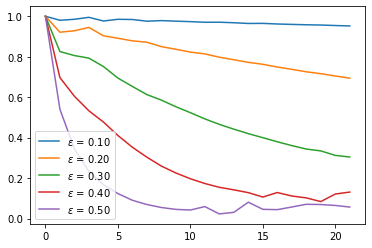

In [17]:
a_list = []
for j,Meps in enumerate(Mz_eps):
    plt.plot(t_list,np.abs(np.array(Meps).real)/121,label=r"$\epsilon$ = %.2f"%((j+1)*0.1))
    popt, pcov = curve_fit(expdecay,t_list,np.abs(np.array(Meps).real)/L)
    a_list.append(popt)
    print(pcov)
plt.legend()

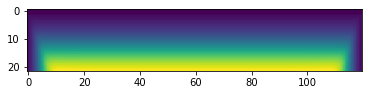

In [30]:
plt.imshow(ent_eps[2])

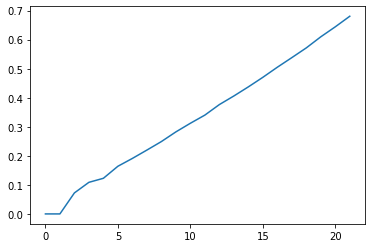

In [46]:
plt.plot(np.array(ent_eps)[0][:,L//2])

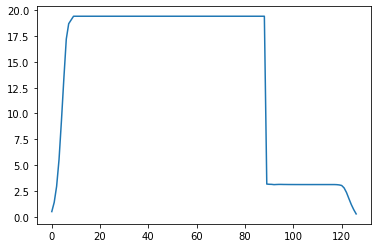

In [8]:
plt.plot(time_engine.MPS.compute_EntEntropy())

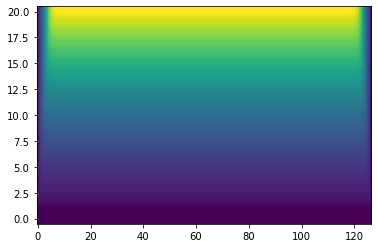

In [13]:
plt.imshow(ent_,origin='lower',aspect='auto')

In [24]:
time_engine.LT[L-2]

0

In [14]:
mz_

array([[ 1.        +0.00000000e+00j,  1.        +0.00000000e+00j,
         1.        +0.00000000e+00j, ...,  1.        +0.00000000e+00j,
         1.        +0.00000000e+00j,  1.        +0.00000000e+00j],
       [-0.92106099+1.51633289e-18j, -0.92106099+0.00000000e+00j,
        -0.92106099+0.00000000e+00j, ..., -0.92106099+0.00000000e+00j,
        -0.92106099+0.00000000e+00j, -0.92106099+0.00000000e+00j],
       [ 0.91146063+0.00000000e+00j,  0.92846204+0.00000000e+00j,
         0.92846204+0.00000000e+00j, ...,  0.92846204+0.00000000e+00j,
         0.92846204+0.00000000e+00j,  0.91146063+0.00000000e+00j],
       ...,
       [ 0.94371211+0.00000000e+00j,  0.87887658+0.00000000e+00j,
         0.83648094+0.00000000e+00j, ...,  0.83648094+0.00000000e+00j,
         0.87887658+0.00000000e+00j,  0.9437121 +0.00000000e+00j],
       [-0.94678837+0.00000000e+00j, -0.87782926+0.00000000e+00j,
        -0.83447837+0.00000000e+00j, ..., -0.83447836+0.00000000e+00j,
        -0.87782926+0.00000000e+00j